In [1]:
import bz2
import pickle 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_result(fname):
    if fname.endswith('.pbz2'):
        with bz2.BZ2File(fname,'r') as h:
            data = pickle.load(h)
    else:
        with open(fname,'rb') as h:
            data = pickle.load(h)
    return data

def pass_result(data):
    result_array = []

    for run in data['runs']:
        set_sparsity = run['set_sparsity']
        set_metrics = run['run']['set_metrics']
        accuracies = [metrics[-1] for metrics in set_metrics]
        result_array.append((set_sparsity, accuracies))
    
    for item in result_array:
        sparsity_level = item[0]
        last_numbers = item[1]
   
    max_value = max(result_array, key=lambda x: x[1][-1])
    max_sparsity_level = max_value[0]
    max_last_number = max_value[1][-1]
    return (max_sparsity_level,max_last_number,result_array)

## SET FMNIST

In [10]:
result_set_0 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_fmnist/set_mlp_density_run_0.pickle.pbz2')
result_set_1 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_fmnist/set_mlp_density_run_1.pickle.pbz2')
result_set_2 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_fmnist/set_mlp_density_run_2.pickle.pbz2')
result_set_3 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_fmnist/set_mlp_density_run_3.pickle.pbz2')



/var/folders/ft/zv9hz6rx7q3b27t_fsw8h4300000gn/T/ipykernel_92975/537062134.py:4: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  data = pickle.load(h)


In [12]:
result = []

for i in range(4):
    result_set = globals()['result_set_{}'.format(i)]  
    result_run = pass_result(result_set)
    sparsity_level = result_run[0]
    max_accuracy = result_run[1]
    accuracies = result_run[2]
    result.append((sparsity_level, max_accuracy,accuracies))

df = pd.DataFrame(result, columns=['Sparsity Level', 'Values','Accuracies'])

print(df)

   Sparsity Level  Values                                         Accuracies
0              21   0.814  [(1, [0.104, 0.088, 0.109, 0.102, 0.112, 0.088...
1              31   0.821  [(1, [0.099, 0.095, 0.108, 0.108, 0.099, 0.095...
2              27   0.827  [(1, [0.092, 0.097, 0.092, 0.097, 0.098, 0.099...
3              27   0.826  [(1, [0.107, 0.085, 0.085, 0.085, 0.085, 0.106...


In [37]:
fmnist_result_0 = df['Accuracies'][0]
fmnist_result_1 = df['Accuracies'][1]
fmnist_result_2 = df['Accuracies'][2]
fmnist_result_3 = df['Accuracies'][3]
fmnist_df_0 = pd.DataFrame(fmnist_result_0,columns = ['sparsity','accuracy_1'])
fmnist_df_1 = pd.DataFrame(fmnist_result_1,columns = ['sparsity','accuracy_2'])
fmnist_df_2 = pd.DataFrame(fmnist_result_2,columns = ['sparsity','accuracy_3'])
fmnist_df_3 = pd.DataFrame(fmnist_result_3,columns = ['sparsity','accuracy_4'])
fmnist_df_0['accuracy_1'] = fmnist_df_0['accuracy_1'].apply(max)
fmnist_df_1['accuracy_2'] = fmnist_df_1['accuracy_2'].apply(max)
fmnist_df_2['accuracy_3'] = fmnist_df_2['accuracy_3'].apply(max)
fmnist_df_3['accuracy_4'] = fmnist_df_3['accuracy_4'].apply(max)
fmnist_result = pd.merge(fmnist_df_0,fmnist_df_1)
fmnist_result = pd.merge(fmnist_result,fmnist_df_2)
fmnist_result = pd.merge(fmnist_result,fmnist_df_3)
fmnist_result['average'] = fmnist_result[['accuracy_1','accuracy_2','accuracy_3','accuracy_4']].mean(axis = 1)
fmnist_result['max'] = fmnist_result[['accuracy_1','accuracy_2','accuracy_3','accuracy_4']].max(axis = 1)
fmnist_result['min'] = fmnist_result[['accuracy_1','accuracy_2','accuracy_3','accuracy_4']].min(axis = 1)
fmnist_result = fmnist_result[['sparsity','average','max','min']]
fmnist_result

,sparsity,average,max,min
0,1,0.11175,0.120,0.107
1,3,0.11425,0.120,0.107
2,5,0.12025,0.130,0.113
3,7,0.54075,0.628,0.340
4,9,0.71400,0.734,0.682
5,11,0.77450,0.792,0.744
6,13,0.78475,0.791,0.780
7,15,0.79050,0.807,0.770
8,17,0.79675,0.806,0.786
9,19,0.81400,0.822,0.796


## SET_MOTIF FMNIST

In [48]:
result_motif_set_0 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_motif_fmnist/set_mlp_density_run_0.pickle.pbz2')
result_motif_set_1 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_motif_fmnist/set_mlp_density_run_1.pickle.pbz2')
result_motif_set_2 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_motif_fmnist/set_mlp_density_run_2.pickle.pbz2')
result_motif_set_3 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_motif_fmnist/set_mlp_density_run_3.pickle.pbz2')


/var/folders/ft/zv9hz6rx7q3b27t_fsw8h4300000gn/T/ipykernel_92975/537062134.py:4: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  data = pickle.load(h)


In [52]:
result_motif = []

for i in range(4):
    result_set = globals()['result_motif_set_{}'.format(i)]  
    result_run = pass_result(result_set)
    sparsity_level = result_run[0]
    max_accuracy = result_run[1]
    accuracies = result_run[2]
    result_motif.append((sparsity_level, max_accuracy,accuracies))

df_motif = pd.DataFrame(result_motif, columns=['Sparsity Level', 'Values','Accuracies'])

print(df)

   Sparsity Level  Values                                         Accuracies
0              21   0.814  [(1, [0.104, 0.088, 0.109, 0.102, 0.112, 0.088...
1              31   0.821  [(1, [0.099, 0.095, 0.108, 0.108, 0.099, 0.095...
2              27   0.827  [(1, [0.092, 0.097, 0.092, 0.097, 0.098, 0.099...
3              27   0.826  [(1, [0.107, 0.085, 0.085, 0.085, 0.085, 0.106...


In [53]:
fmnist_motif_result_0 = df_motif['Accuracies'][0]
fmnist_motif_result_1 = df_motif['Accuracies'][1]
fmnist_motif_result_2 = df_motif['Accuracies'][2]
fmnist_motif_result_3 = df_motif['Accuracies'][3]
fmnist_motif_df_0 = pd.DataFrame(fmnist_motif_result_0,columns = ['sparsity','accuracy_1'])
fmnist_motif_df_1 = pd.DataFrame(fmnist_motif_result_1,columns = ['sparsity','accuracy_2'])
fmnist_motif_df_2 = pd.DataFrame(fmnist_motif_result_2,columns = ['sparsity','accuracy_3'])
fmnist_motif_df_3 = pd.DataFrame(fmnist_motif_result_3,columns = ['sparsity','accuracy_4'])
fmnist_motif_df_0['accuracy_1'] = fmnist_motif_df_0['accuracy_1'].apply(max)
fmnist_motif_df_1['accuracy_2'] = fmnist_motif_df_1['accuracy_2'].apply(max)
fmnist_motif_df_2['accuracy_3'] = fmnist_motif_df_2['accuracy_3'].apply(max)
fmnist_motif_df_3['accuracy_4'] = fmnist_motif_df_3['accuracy_4'].apply(max)
fmnist_motif_result = pd.merge(fmnist_motif_df_0,fmnist_motif_df_1)
fmnist_motif_result = pd.merge(fmnist_motif_result,fmnist_motif_df_2)
fmnist_motif_result = pd.merge(fmnist_motif_result,fmnist_motif_df_3)
fmnist_motif_result['average'] = fmnist_motif_result[['accuracy_1','accuracy_2','accuracy_3','accuracy_4']].mean(axis = 1)
fmnist_motif_result['max'] = fmnist_motif_result[['accuracy_1','accuracy_2','accuracy_3','accuracy_4']].max(axis = 1)
fmnist_motif_result['min'] = fmnist_motif_result[['accuracy_1','accuracy_2','accuracy_3','accuracy_4']].min(axis = 1)
fmnist_motif_result = fmnist_motif_result[['sparsity','average','max','min']]
fmnist_motif_result

,sparsity,average,max,min
0,1,0.11175,0.120,0.107
1,3,0.11425,0.120,0.107
2,5,0.11425,0.120,0.107
3,7,0.22425,0.337,0.115
4,9,0.67900,0.721,0.611
5,11,0.73500,0.767,0.711
6,13,0.77150,0.790,0.755
7,15,0.78250,0.798,0.773
8,17,0.79050,0.803,0.780
9,19,0.79100,0.811,0.775


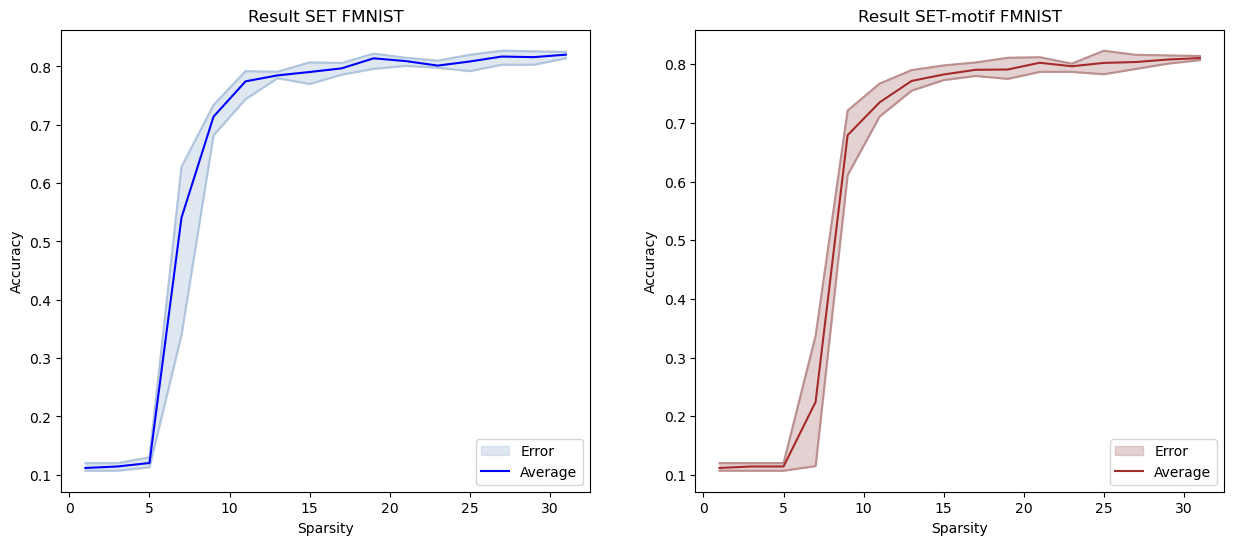

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].plot(fmnist_result['sparsity'], fmnist_result['max'], color='lightsteelblue')
axs[0].plot(fmnist_result['sparsity'], fmnist_result['min'], color='lightsteelblue')
axs[0].fill_between(fmnist_result['sparsity'], fmnist_result['min'], fmnist_result['max'], label='Error', color='lightsteelblue', alpha=0.4)
axs[0].plot(fmnist_result['sparsity'], fmnist_result['average'], label = 'Average',color='blue')
axs[0].set_xlabel('Sparsity')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Result SET FMNIST')
axs[0].legend(loc = 'lower right',fontsize = 'medium')

axs[1].plot(fmnist_motif_result['sparsity'], fmnist_motif_result['max'], color='rosybrown')
axs[1].plot(fmnist_motif_result['sparsity'], fmnist_motif_result['min'], color='rosybrown')
axs[1].fill_between(fmnist_motif_result['sparsity'], fmnist_motif_result['min'], fmnist_motif_result['max'], label='Error', color='rosybrown', alpha=0.4)
axs[1].plot(fmnist_motif_result['sparsity'], fmnist_motif_result['average'], label = 'Average',color='brown')
axs[1].set_xlabel('Sparsity')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Result SET-motif FMNIST')
axs[1].legend(loc = 'lower right',fontsize = 'medium')



## SET_FMNIST_STRESS

In [69]:
result_set_stress_0 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_fmnist_16/set_mlp_density_run_0.pickle.pbz2')
result_set_stress_1 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_fmnist_16/set_mlp_density_run_1.pickle.pbz2')
result_set_stress_2 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_fmnist_16/set_mlp_density_run_2.pickle.pbz2')
result_set_stress_3 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_fmnist_16/set_mlp_density_run_3.pickle.pbz2')
result_set_stress_4 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_fmnist_16/set_mlp_density_run_4.pickle.pbz2')
result_set_stress_5 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_fmnist_16/set_mlp_density_run_5.pickle.pbz2')
result_set_stress_6 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_fmnist_16/set_mlp_density_run_6.pickle.pbz2')
result_set_stress_7 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_fmnist_16/set_mlp_density_run_7.pickle.pbz2')
result_set_stress_8 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_fmnist_16/set_mlp_density_run_8.pickle.pbz2')
result_set_stress_9 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_fmnist_16/set_mlp_density_run_9.pickle.pbz2')
result_set_stress_10 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_fmnist_16/set_mlp_density_run_10.pickle.pbz2')
result_set_stress_11 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_fmnist_16/set_mlp_density_run_11.pickle.pbz2')
result_set_stress_12 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_fmnist_16/set_mlp_density_run_12.pickle.pbz2')
result_set_stress_13 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_fmnist_16/set_mlp_density_run_13.pickle.pbz2')
result_set_stress_14 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_fmnist_16/set_mlp_density_run_14.pickle.pbz2')
result_set_stress_15 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_fmnist_16/set_mlp_density_run_15.pickle.pbz2')

/var/folders/ft/zv9hz6rx7q3b27t_fsw8h4300000gn/T/ipykernel_92975/537062134.py:4: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  data = pickle.load(h)


In [70]:
result_stress = []

for i in range(16):
    result_set = globals()['result_set_stress_{}'.format(i)]  
    result_run = pass_result(result_set)
    sparsity_level = result_run[0]
    max_accuracy = result_run[1]
    accuracies = result_run[2]
    result_stress.append((sparsity_level, max_accuracy,accuracies))

df_stress = pd.DataFrame(result_stress, columns=['Sparsity Level', 'Values','Accuracies'])

print(df_stress)

    Sparsity Level  Values                                         Accuracies
0               21   0.814  [(1, [0.104, 0.088, 0.109, 0.102, 0.112, 0.088...
1               31   0.821  [(1, [0.099, 0.095, 0.108, 0.108, 0.099, 0.095...
2               27   0.827  [(1, [0.092, 0.097, 0.092, 0.097, 0.098, 0.099...
3               27   0.826  [(1, [0.107, 0.085, 0.085, 0.085, 0.085, 0.106...
4               21   0.816  [(1, [0.098, 0.091, 0.098, 0.091, 0.091, 0.097...
5               31   0.825  [(1, [0.116, 0.098, 0.118, 0.116, 0.116, 0.1, ...
6               29   0.822  [(1, [0.103, 0.088, 0.103, 0.106, 0.086, 0.088...
7               27   0.807  [(1, [0.096, 0.091, 0.099, 0.099, 0.092, 0.11,...
8               27   0.812  [(1, [0.106, 0.106, 0.106, 0.111, 0.106, 0.106...
9               31   0.841  [(1, [0.109, 0.109, 0.104, 0.094, 0.094, 0.109...
10              27   0.833  [(1, [0.093, 0.108, 0.112, 0.088, 0.088, 0.112...
11              29   0.819  [(1, [0.1, 0.111, 0.104, 0.104, 0.1,

In [ ]:
result_stress = []

for i in range(16):
    result_set = globals()['result_set_stress_{}'.format(i)]  
    result_run = pass_result(result_set)
    sparsity_level = result_run[0]
    max_accuracy = result_run[1]
    accuracies = result_run[2]
    result_stress.append((sparsity_level, max_accuracy,accuracies))

df_stress = pd.DataFrame(result_stress, columns=['Sparsity Level', 'Values','Accuracies'])

print(df_stress)

In [90]:
fmnist_stress_result_0 = df_stress['Accuracies'][0]
fmnist_stress_result_1 = df_stress['Accuracies'][1]
fmnist_stress_result_2 = df_stress['Accuracies'][2]
fmnist_stress_result_3 = df_stress['Accuracies'][3]
fmnist_stress_result_4 = df_stress['Accuracies'][4]
fmnist_stress_result_5 = df_stress['Accuracies'][5]
fmnist_stress_result_6 = df_stress['Accuracies'][6]
fmnist_stress_result_7 = df_stress['Accuracies'][7]
fmnist_stress_result_8 = df_stress['Accuracies'][8]
fmnist_stress_result_9 = df_stress['Accuracies'][9]
fmnist_stress_result_10 = df_stress['Accuracies'][10]
fmnist_stress_result_11 = df_stress['Accuracies'][11]
fmnist_stress_result_12 = df_stress['Accuracies'][12]
fmnist_stress_result_13 = df_stress['Accuracies'][13]
fmnist_stress_result_14 = df_stress['Accuracies'][14]
fmnist_stress_result_15 = df_stress['Accuracies'][15]
fmnist_stress_df_0 = pd.DataFrame(fmnist_stress_result_0,columns = ['sparsity','accuracy_1'])
fmnist_stress_df_1 = pd.DataFrame(fmnist_stress_result_1,columns = ['sparsity','accuracy_2'])
fmnist_stress_df_2 = pd.DataFrame(fmnist_stress_result_2,columns = ['sparsity','accuracy_3'])
fmnist_stress_df_3 = pd.DataFrame(fmnist_stress_result_3,columns = ['sparsity','accuracy_4'])
fmnist_stress_df_4 = pd.DataFrame(fmnist_stress_result_4,columns = ['sparsity','accuracy_5'])
fmnist_stress_df_5 = pd.DataFrame(fmnist_stress_result_5,columns = ['sparsity','accuracy_6'])
fmnist_stress_df_6 = pd.DataFrame(fmnist_stress_result_6,columns = ['sparsity','accuracy_7'])
fmnist_stress_df_7 = pd.DataFrame(fmnist_stress_result_7,columns = ['sparsity','accuracy_8'])
fmnist_stress_df_8 = pd.DataFrame(fmnist_stress_result_8,columns = ['sparsity','accuracy_9'])
fmnist_stress_df_9 = pd.DataFrame(fmnist_stress_result_9,columns = ['sparsity','accuracy_10'])
fmnist_stress_df_10 = pd.DataFrame(fmnist_stress_result_10,columns = ['sparsity','accuracy_11'])
fmnist_stress_df_11 = pd.DataFrame(fmnist_stress_result_11,columns = ['sparsity','accuracy_12'])
fmnist_stress_df_12 = pd.DataFrame(fmnist_stress_result_12,columns = ['sparsity','accuracy_13'])
fmnist_stress_df_13 = pd.DataFrame(fmnist_stress_result_13,columns = ['sparsity','accuracy_14'])
fmnist_stress_df_14 = pd.DataFrame(fmnist_stress_result_14,columns = ['sparsity','accuracy_15'])
fmnist_stress_df_15 = pd.DataFrame(fmnist_stress_result_15,columns = ['sparsity','accuracy_16'])
fmnist_stress_df_0['accuracy_1'] = fmnist_stress_df_0['accuracy_1'].apply(max)
fmnist_stress_df_1['accuracy_2'] = fmnist_stress_df_1['accuracy_2'].apply(max)
fmnist_stress_df_2['accuracy_3'] = fmnist_stress_df_2['accuracy_3'].apply(max)
fmnist_stress_df_3['accuracy_4'] = fmnist_stress_df_3['accuracy_4'].apply(max)
fmnist_stress_df_4['accuracy_5'] = fmnist_stress_df_4['accuracy_5'].apply(max) 
fmnist_stress_df_5['accuracy_6'] = fmnist_stress_df_5['accuracy_6'].apply(max)
fmnist_stress_df_6['accuracy_7'] = fmnist_stress_df_6['accuracy_7'].apply(max)
fmnist_stress_df_7['accuracy_8'] = fmnist_stress_df_7['accuracy_8'].apply(max)
fmnist_stress_df_8['accuracy_9'] = fmnist_stress_df_8['accuracy_9'].apply(max)
fmnist_stress_df_9['accuracy_10'] = fmnist_stress_df_9['accuracy_10'].apply(max)
fmnist_stress_df_10['accuracy_11'] = fmnist_stress_df_10['accuracy_11'].apply(max)
fmnist_stress_df_11['accuracy_12'] = fmnist_stress_df_11['accuracy_12'].apply(max)
fmnist_stress_df_12['accuracy_13'] = fmnist_stress_df_12['accuracy_13'].apply(max)
fmnist_stress_df_13['accuracy_14'] = fmnist_stress_df_13['accuracy_14'].apply(max)
fmnist_stress_df_14['accuracy_15'] = fmnist_stress_df_14['accuracy_15'].apply(max)
fmnist_stress_df_15['accuracy_16'] = fmnist_stress_df_15['accuracy_16'].apply(max)
fmnist_stress_result = pd.merge(fmnist_stress_df_0,fmnist_stress_df_1)
fmnist_stress_result = pd.merge(fmnist_stress_result,fmnist_stress_df_2)
fmnist_stress_result = pd.merge(fmnist_stress_result,fmnist_stress_df_3)
fmnist_stress_result = pd.merge(fmnist_stress_result,fmnist_stress_df_4)
fmnist_stress_result = pd.merge(fmnist_stress_result,fmnist_stress_df_5)
fmnist_stress_result = pd.merge(fmnist_stress_result,fmnist_stress_df_6)
fmnist_stress_result = pd.merge(fmnist_stress_result,fmnist_stress_df_7)
fmnist_stress_result = pd.merge(fmnist_stress_result,fmnist_stress_df_8)
fmnist_stress_result = pd.merge(fmnist_stress_result,fmnist_stress_df_9)
fmnist_stress_result = pd.merge(fmnist_stress_result,fmnist_stress_df_10)
fmnist_stress_result = pd.merge(fmnist_stress_result,fmnist_stress_df_11)
fmnist_stress_result = pd.merge(fmnist_stress_result,fmnist_stress_df_12)
fmnist_stress_result = pd.merge(fmnist_stress_result,fmnist_stress_df_13)
fmnist_stress_result = pd.merge(fmnist_stress_result,fmnist_stress_df_14)
fmnist_stress_result = pd.merge(fmnist_stress_result,fmnist_stress_df_15)

fmnist_stress_result['average'] = fmnist_stress_result[['accuracy_1','accuracy_2','accuracy_3','accuracy_4','accuracy_5','accuracy_6','accuracy_7','accuracy_8','accuracy_9','accuracy_10','accuracy_11','accuracy_12','accuracy_13','accuracy_14','accuracy_15','accuracy_16']].mean(axis = 1)
fmnist_stress_result['max'] = fmnist_stress_result[['accuracy_1','accuracy_2','accuracy_3','accuracy_4','accuracy_5','accuracy_6','accuracy_7','accuracy_8','accuracy_9','accuracy_10','accuracy_11','accuracy_12','accuracy_13','accuracy_14','accuracy_15','accuracy_16']].max(axis = 1)
fmnist_stress_result['min'] = fmnist_stress_result[['accuracy_1','accuracy_2','accuracy_3','accuracy_4','accuracy_5','accuracy_6','accuracy_7','accuracy_8','accuracy_9','accuracy_10','accuracy_11','accuracy_12','accuracy_13','accuracy_14','accuracy_15','accuracy_16']].min(axis = 1)
fmnist_stress_result = fmnist_stress_result[['sparsity','average','max','min']]
fmnist_stress_result

,sparsity,average,max,min
0,1,0.112188,0.122,0.098
1,3,0.113688,0.122,0.107
2,5,0.112438,0.130,0.098
3,7,0.555437,0.664,0.340
4,9,0.715875,0.768,0.660
5,11,0.766750,0.794,0.728
6,13,0.783062,0.806,0.738
7,15,0.790187,0.812,0.767
8,17,0.799188,0.815,0.782
9,19,0.804000,0.826,0.786


## SET_MOTIF_FMNIST_STRESS

In [82]:
result_motif_set_stress_0 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_motif_fmnist_16/set_mlp_density_run_0.pickle.pbz2')
result_motif_set_stress_1 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_motif_fmnist_16/set_mlp_density_run_1.pickle.pbz2')
result_motif_set_stress_2 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_motif_fmnist_16/set_mlp_density_run_2.pickle.pbz2')
result_motif_set_stress_3 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_motif_fmnist_16/set_mlp_density_run_3.pickle.pbz2')
result_motif_set_stress_4 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_motif_fmnist_16/set_mlp_density_run_4.pickle.pbz2')
result_motif_set_stress_5 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_motif_fmnist_16/set_mlp_density_run_5.pickle.pbz2')
result_motif_set_stress_6 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_motif_fmnist_16/set_mlp_density_run_6.pickle.pbz2')
result_motif_set_stress_7 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_motif_fmnist_16/set_mlp_density_run_7.pickle.pbz2')
result_motif_set_stress_8 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_motif_fmnist_16/set_mlp_density_run_8.pickle.pbz2')
result_motif_set_stress_9 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_motif_fmnist_16/set_mlp_density_run_9.pickle.pbz2')
result_motif_set_stress_10 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_motif_fmnist_16/set_mlp_density_run_10.pickle.pbz2')
result_motif_set_stress_11 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_motif_fmnist_16/set_mlp_density_run_11.pickle.pbz2')
result_motif_set_stress_12 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_motif_fmnist_16/set_mlp_density_run_12.pickle.pbz2')
result_motif_set_stress_13 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_motif_fmnist_16/set_mlp_density_run_13.pickle.pbz2')
result_motif_set_stress_14 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_motif_fmnist_16/set_mlp_density_run_14.pickle.pbz2')
result_motif_set_stress_15 = load_result('/Users/arcade/Master/thesis_project/result/benchmarks_motif_fmnist_16/set_mlp_density_run_15.pickle.pbz2')

/var/folders/ft/zv9hz6rx7q3b27t_fsw8h4300000gn/T/ipykernel_92975/537062134.py:4: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  data = pickle.load(h)


In [83]:
result_set_stress = []

for i in range(16):
    result_set = globals()['result_motif_set_stress_{}'.format(i)]  
    result_run = pass_result(result_set)
    sparsity_level = result_run[0]
    max_accuracy = result_run[1]
    accuracies = result_run[2]
    result_set_stress.append((sparsity_level, max_accuracy,accuracies))

df_motif_stress = pd.DataFrame(result_set_stress, columns=['Sparsity Level', 'Values','Accuracies'])

print(df_motif_stress)

    Sparsity Level  Values                                         Accuracies
0               25   0.804  [(1, [0.104, 0.104, 0.104, 0.109, 0.088, 0.102...
1               31   0.806  [(1, [0.099, 0.099, 0.095, 0.095, 0.095, 0.108...
2               25   0.823  [(1, [0.092, 0.097, 0.097, 0.098, 0.12, 0.097,...
3               29   0.815  [(1, [0.107, 0.085, 0.093, 0.104, 0.085, 0.106...
4               25   0.803  [(1, [0.098, 0.097, 0.097, 0.091, 0.107, 0.091...
5               19   0.823  [(1, [0.116, 0.083, 0.098, 0.118, 0.118, 0.098...
6               25   0.811  [(1, [0.103, 0.105, 0.105, 0.088, 0.103, 0.103...
7               27   0.806  [(1, [0.096, 0.097, 0.091, 0.091, 0.091, 0.097...
8               21   0.796  [(1, [0.106, 0.106, 0.106, 0.106, 0.107, 0.085...
9               29   0.835  [(1, [0.109, 0.104, 0.098, 0.109, 0.094, 0.106...
10              21   0.811  [(1, [0.093, 0.088, 0.088, 0.1, 0.108, 0.112, ...
11              29   0.813  [(1, [0.1, 0.118, 0.1, 0.099, 0.099,

In [87]:
fmnist_motif_stress_result_0 = df_motif_stress['Accuracies'][0]
fmnist_motif_stress_result_1 = df_motif_stress['Accuracies'][1]
fmnist_motif_stress_result_2 = df_motif_stress['Accuracies'][2]
fmnist_motif_stress_result_3 = df_motif_stress['Accuracies'][3]
fmnist_motif_stress_result_4 = df_motif_stress['Accuracies'][4]
fmnist_motif_stress_result_5 = df_motif_stress['Accuracies'][5]
fmnist_motif_stress_result_6 = df_motif_stress['Accuracies'][6]
fmnist_motif_stress_result_7 = df_motif_stress['Accuracies'][7]
fmnist_motif_stress_result_8 = df_motif_stress['Accuracies'][8]
fmnist_motif_stress_result_9 = df_motif_stress['Accuracies'][9]
fmnist_motif_stress_result_10 = df_motif_stress['Accuracies'][10]
fmnist_motif_stress_result_11 = df_motif_stress['Accuracies'][11]
fmnist_motif_stress_result_12 = df_motif_stress['Accuracies'][12]
fmnist_motif_stress_result_13 = df_motif_stress['Accuracies'][13]
fmnist_motif_stress_result_14 = df_motif_stress['Accuracies'][14]
fmnist_motif_stress_result_15 = df_motif_stress['Accuracies'][15]
fmnist_motif_stress_df_0 = pd.DataFrame(fmnist_motif_stress_result_0,columns = ['sparsity','accuracy_1'])
fmnist_motif_stress_df_1 = pd.DataFrame(fmnist_motif_stress_result_1,columns = ['sparsity','accuracy_2'])
fmnist_motif_stress_df_2 = pd.DataFrame(fmnist_motif_stress_result_2,columns = ['sparsity','accuracy_3'])
fmnist_motif_stress_df_3 = pd.DataFrame(fmnist_motif_stress_result_3,columns = ['sparsity','accuracy_4'])
fmnist_motif_stress_df_4 = pd.DataFrame(fmnist_motif_stress_result_4,columns = ['sparsity','accuracy_5'])
fmnist_motif_stress_df_5 = pd.DataFrame(fmnist_motif_stress_result_5,columns = ['sparsity','accuracy_6'])
fmnist_motif_stress_df_6 = pd.DataFrame(fmnist_motif_stress_result_6,columns = ['sparsity','accuracy_7'])
fmnist_motif_stress_df_7 = pd.DataFrame(fmnist_motif_stress_result_7,columns = ['sparsity','accuracy_8'])
fmnist_motif_stress_df_8 = pd.DataFrame(fmnist_motif_stress_result_8,columns = ['sparsity','accuracy_9'])
fmnist_motif_stress_df_9 = pd.DataFrame(fmnist_motif_stress_result_9,columns = ['sparsity','accuracy_10'])
fmnist_motif_stress_df_10 = pd.DataFrame(fmnist_motif_stress_result_10,columns = ['sparsity','accuracy_11'])
fmnist_motif_stress_df_11 = pd.DataFrame(fmnist_motif_stress_result_11,columns = ['sparsity','accuracy_12'])
fmnist_motif_stress_df_12 = pd.DataFrame(fmnist_motif_stress_result_12,columns = ['sparsity','accuracy_13'])
fmnist_motif_stress_df_13 = pd.DataFrame(fmnist_motif_stress_result_13,columns = ['sparsity','accuracy_14'])
fmnist_motif_stress_df_14 = pd.DataFrame(fmnist_motif_stress_result_14,columns = ['sparsity','accuracy_15'])
fmnist_motif_stress_df_15 = pd.DataFrame(fmnist_motif_stress_result_15,columns = ['sparsity','accuracy_16'])
fmnist_motif_stress_df_0['accuracy_1'] = fmnist_motif_stress_df_0['accuracy_1'].apply(max)
fmnist_motif_stress_df_1['accuracy_2'] = fmnist_motif_stress_df_1['accuracy_2'].apply(max)
fmnist_motif_stress_df_2['accuracy_3'] = fmnist_motif_stress_df_2['accuracy_3'].apply(max)
fmnist_motif_stress_df_3['accuracy_4'] = fmnist_motif_stress_df_3['accuracy_4'].apply(max)
fmnist_motif_stress_df_4['accuracy_5'] = fmnist_motif_stress_df_4['accuracy_5'].apply(max) 
fmnist_motif_stress_df_5['accuracy_6'] = fmnist_motif_stress_df_5['accuracy_6'].apply(max)
fmnist_motif_stress_df_6['accuracy_7'] = fmnist_motif_stress_df_6['accuracy_7'].apply(max)
fmnist_motif_stress_df_7['accuracy_8'] = fmnist_motif_stress_df_7['accuracy_8'].apply(max)
fmnist_motif_stress_df_8['accuracy_9'] = fmnist_motif_stress_df_8['accuracy_9'].apply(max)
fmnist_motif_stress_df_9['accuracy_10'] = fmnist_motif_stress_df_9['accuracy_10'].apply(max)
fmnist_motif_stress_df_10['accuracy_11'] = fmnist_motif_stress_df_10['accuracy_11'].apply(max)
fmnist_motif_stress_df_11['accuracy_12'] = fmnist_motif_stress_df_11['accuracy_12'].apply(max)
fmnist_motif_stress_df_12['accuracy_13'] = fmnist_motif_stress_df_12['accuracy_13'].apply(max)
fmnist_motif_stress_df_13['accuracy_14'] = fmnist_motif_stress_df_13['accuracy_14'].apply(max)
fmnist_motif_stress_df_14['accuracy_15'] = fmnist_motif_stress_df_14['accuracy_15'].apply(max)
fmnist_motif_stress_df_15['accuracy_16'] = fmnist_motif_stress_df_15['accuracy_16'].apply(max)
fmnist_motif_stress_result = pd.merge(fmnist_motif_stress_df_0,fmnist_motif_stress_df_1)
fmnist_motif_stress_result = pd.merge(fmnist_motif_stress_result,fmnist_motif_stress_df_2)
fmnist_motif_stress_result = pd.merge(fmnist_motif_stress_result,fmnist_motif_stress_df_3)
fmnist_motif_stress_result = pd.merge(fmnist_motif_stress_result,fmnist_motif_stress_df_4)
fmnist_motif_stress_result = pd.merge(fmnist_motif_stress_result,fmnist_motif_stress_df_5)
fmnist_motif_stress_result = pd.merge(fmnist_motif_stress_result,fmnist_motif_stress_df_6)
fmnist_motif_stress_result = pd.merge(fmnist_motif_stress_result,fmnist_motif_stress_df_7)
fmnist_motif_stress_result = pd.merge(fmnist_motif_stress_result,fmnist_motif_stress_df_8)
fmnist_motif_stress_result = pd.merge(fmnist_motif_stress_result,fmnist_motif_stress_df_9)
fmnist_motif_stress_result = pd.merge(fmnist_motif_stress_result,fmnist_motif_stress_df_10)
fmnist_motif_stress_result = pd.merge(fmnist_motif_stress_result,fmnist_motif_stress_df_11)
fmnist_motif_stress_result = pd.merge(fmnist_motif_stress_result,fmnist_motif_stress_df_12)
fmnist_motif_stress_result = pd.merge(fmnist_motif_stress_result,fmnist_motif_stress_df_13)
fmnist_motif_stress_result = pd.merge(fmnist_motif_stress_result,fmnist_motif_stress_df_14)
fmnist_motif_stress_result = pd.merge(fmnist_motif_stress_result,fmnist_motif_stress_df_15)

fmnist_motif_stress_result['average'] = fmnist_motif_stress_result[['accuracy_1','accuracy_2','accuracy_3','accuracy_4','accuracy_5','accuracy_6','accuracy_7','accuracy_8','accuracy_9','accuracy_10','accuracy_11','accuracy_12','accuracy_13','accuracy_14','accuracy_15','accuracy_16']].mean(axis = 1)
fmnist_motif_stress_result['max'] = fmnist_motif_stress_result[['accuracy_1','accuracy_2','accuracy_3','accuracy_4','accuracy_5','accuracy_6','accuracy_7','accuracy_8','accuracy_9','accuracy_10','accuracy_11','accuracy_12','accuracy_13','accuracy_14','accuracy_15','accuracy_16']].max(axis = 1)
fmnist_motif_stress_result['min'] = fmnist_motif_stress_result[['accuracy_1','accuracy_2','accuracy_3','accuracy_4','accuracy_5','accuracy_6','accuracy_7','accuracy_8','accuracy_9','accuracy_10','accuracy_11','accuracy_12','accuracy_13','accuracy_14','accuracy_15','accuracy_16']].min(axis = 1)
fmnist_motif_stress_result = fmnist_motif_stress_result[['sparsity','average','max','min']]
fmnist_motif_stress_result

,sparsity,average,max,min
0,1,0.113000,0.124,0.107
1,3,0.113000,0.124,0.106
2,5,0.114375,0.122,0.107
3,7,0.263813,0.592,0.108
4,9,0.657125,0.721,0.413
5,11,0.735625,0.788,0.684
6,13,0.760938,0.807,0.707
7,15,0.779125,0.800,0.759
8,17,0.789437,0.816,0.761
9,19,0.796750,0.826,0.775


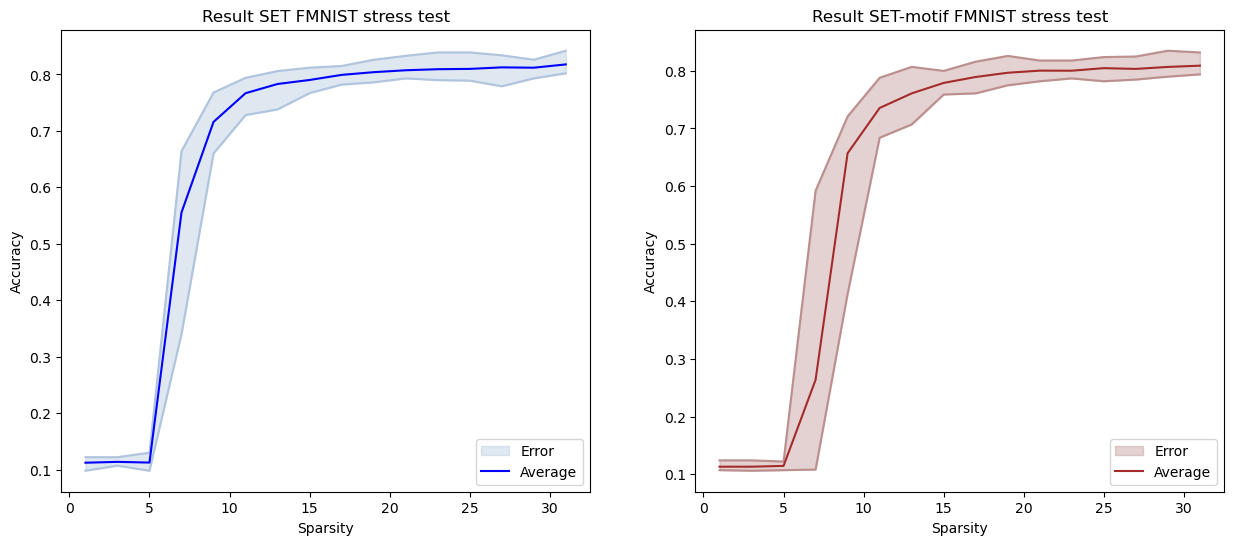

In [92]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].plot(fmnist_stress_result['sparsity'], fmnist_stress_result['max'], color='lightsteelblue')
axs[0].plot(fmnist_stress_result['sparsity'], fmnist_stress_result['min'], color='lightsteelblue')
axs[0].fill_between(fmnist_stress_result['sparsity'], fmnist_stress_result['min'], fmnist_stress_result['max'], label='Error', color='lightsteelblue', alpha=0.4)
axs[0].plot(fmnist_stress_result['sparsity'], fmnist_stress_result['average'], label = 'Average',color='blue')
axs[0].set_xlabel('Sparsity')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Result SET FMNIST stress test')
axs[0].legend(loc = 'lower right',fontsize = 'medium')

axs[1].plot(fmnist_motif_stress_result['sparsity'], fmnist_motif_stress_result['max'], color='rosybrown')
axs[1].plot(fmnist_motif_stress_result['sparsity'], fmnist_motif_stress_result['min'], color='rosybrown')
axs[1].fill_between(fmnist_motif_stress_result['sparsity'], fmnist_motif_stress_result['min'], fmnist_motif_stress_result['max'], label='Error', color='rosybrown', alpha=0.4)
axs[1].plot(fmnist_motif_stress_result['sparsity'], fmnist_motif_stress_result['average'], label = 'Average',color='brown')
axs[1].set_xlabel('Sparsity')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Result SET-motif FMNIST stress test')
axs[1].legend(loc = 'lower right',fontsize = 'medium')

## SET Lung 

In [3]:
result_lung_0 = load_result('/Users/arcade/PycharmProjects/set_learn/robustness_set-main copy/set_motif/bench_mark_lung/one/set_mlp_density_run_0.pickle')
result_lung_1 = load_result('/Users/arcade/PycharmProjects/set_learn/robustness_set-main copy/set_motif/bench_mark_lung/one/set_mlp_density_run_1.pickle')
result_lung_2 = load_result('/Users/arcade/PycharmProjects/set_learn/robustness_set-main copy/set_motif/bench_mark_lung/one/set_mlp_density_run_2.pickle')
result_lung_3 = load_result('/Users/arcade/PycharmProjects/set_learn/robustness_set-main copy/set_motif/bench_mark_lung/one/set_mlp_density_run_3.pickle')

/var/folders/ft/zv9hz6rx7q3b27t_fsw8h4300000gn/T/ipykernel_9736/418054726.py:7: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  data = pickle.load(h)


In [5]:
result_lung = []

for i in range(4):
    result_set = globals()['result_lung_{}'.format(i)]  
    result_run = pass_result(result_set)
    sparsity_level = result_run[0]
    max_accuracy = result_run[1]
    accuracies = result_run[2]
    result_lung.append((sparsity_level, max_accuracy,accuracies))

df_lung = pd.DataFrame(result_lung, columns=['Sparsity Level', 'Values','Accuracies'])

print(df_lung)

   Sparsity Level    Values                                         Accuracies
0               6  0.955882  [(1, [0.7205882352941176, 0.7205882352941176, ...
1              13  0.941176  [(1, [0.6911764705882353, 0.6911764705882353, ...
2               4  0.985294  [(1, [0.6911764705882353, 0.6911764705882353, ...
3               6  0.926471  [(1, [0.7352941176470589, 0.7352941176470589, ...


In [7]:
lung_result_0 = df_lung['Accuracies'][0]
lung_result_1 = df_lung['Accuracies'][1]
lung_result_2 = df_lung['Accuracies'][2]
lung_result_3 = df_lung['Accuracies'][3]
lung_df_0 = pd.DataFrame(lung_result_0,columns = ['sparsity','accuracy_1'])
lung_df_1 = pd.DataFrame(lung_result_1,columns = ['sparsity','accuracy_2'])
lung_df_2 = pd.DataFrame(lung_result_2,columns = ['sparsity','accuracy_3'])
lung_df_3 = pd.DataFrame(lung_result_3,columns = ['sparsity','accuracy_4'])
lung_df_0['accuracy_1'] = lung_df_0['accuracy_1'].apply(max)
lung_df_1['accuracy_2'] = lung_df_1['accuracy_2'].apply(max)
lung_df_2['accuracy_3'] = lung_df_2['accuracy_3'].apply(max)
lung_df_3['accuracy_4'] = lung_df_3['accuracy_4'].apply(max)
lung_result = pd.merge(lung_df_0,lung_df_1)
lung_result = pd.merge(lung_result,lung_df_2)
lung_result = pd.merge(lung_result,lung_df_3)
lung_result['average'] = lung_result[['accuracy_1','accuracy_2','accuracy_3','accuracy_4']].mean(axis = 1)
lung_result['max'] = lung_result[['accuracy_1','accuracy_2','accuracy_3','accuracy_4']].max(axis = 1)
lung_result['min'] = lung_result[['accuracy_1','accuracy_2','accuracy_3','accuracy_4']].min(axis = 1)
lung_result = lung_result[['sparsity','average','max','min']]
lung_result

,sparsity,average,max,min
0,1,0.900735,0.926471,0.867647
1,2,0.926471,0.955882,0.897059
2,3,0.944853,0.955882,0.926471
3,4,0.948529,0.985294,0.911765
4,5,0.941176,0.970588,0.911765
5,6,0.959559,0.985294,0.926471
6,13,0.955882,0.985294,0.926471
7,32,0.959559,0.970588,0.941176


## SET-motif Lung

In [8]:
result_motif_set_lung_0 = load_result('/Users/arcade/PycharmProjects/set_learn/robustness_set-main copy/set_motif/benchmarks_lung_motif_new/benchmark_lung_26_06_2023_15_25_04/set_mlp_density_run_0.pickle')
result_motif_set_lung_1 = load_result('/Users/arcade/PycharmProjects/set_learn/robustness_set-main copy/set_motif/benchmarks_lung_motif_new/benchmark_lung_26_06_2023_15_25_04/set_mlp_density_run_1.pickle')
result_motif_set_lung_2 = load_result('/Users/arcade/PycharmProjects/set_learn/robustness_set-main copy/set_motif/benchmarks_lung_motif_new/benchmark_lung_26_06_2023_15_25_04/set_mlp_density_run_2.pickle')
result_motif_set_lung_3 = load_result('/Users/arcade/PycharmProjects/set_learn/robustness_set-main copy/set_motif/benchmarks_lung_motif_new/benchmark_lung_26_06_2023_15_25_04/set_mlp_density_run_3.pickle')
result_motif_lung = []

for i in range(4):
    result_set = globals()['result_motif_set_lung_{}'.format(i)]  
    result_run = pass_result(result_set)
    sparsity_level = result_run[0]
    max_accuracy = result_run[1]
    accuracies = result_run[2]
    result_motif_lung.append((sparsity_level, max_accuracy,accuracies))

df_motif_lung = pd.DataFrame(result_motif_lung, columns=['Sparsity Level', 'Values','Accuracies'])

print(df_motif_lung)

   Sparsity Level    Values                                         Accuracies
0              13  0.970588  [(1, [0.7205882352941176, 0.7205882352941176, ...
1              13  0.955882  [(1, [0.6911764705882353, 0.6911764705882353, ...
2               6  0.955882  [(1, [0.6911764705882353, 0.6911764705882353, ...
3               2  0.941176  [(1, [0.7352941176470589, 0.7352941176470589, ...


In [9]:
lung_motif_result_0 = df_motif_lung['Accuracies'][0]
lung_motif_result_1 = df_motif_lung['Accuracies'][1]
lung_motif_result_2 = df_motif_lung['Accuracies'][2]
lung_motif_result_3 = df_motif_lung['Accuracies'][3]
lung_motif_df_0 = pd.DataFrame(lung_motif_result_0,columns = ['sparsity','accuracy_1'])
lung_motif_df_1 = pd.DataFrame(lung_motif_result_1,columns = ['sparsity','accuracy_2'])
lung_motif_df_2 = pd.DataFrame(lung_motif_result_2,columns = ['sparsity','accuracy_3'])
lung_motif_df_3 = pd.DataFrame(lung_motif_result_3,columns = ['sparsity','accuracy_4'])
lung_motif_df_0['accuracy_1'] = lung_motif_df_0['accuracy_1'].apply(max)
lung_motif_df_1['accuracy_2'] = lung_motif_df_1['accuracy_2'].apply(max)
lung_motif_df_2['accuracy_3'] = lung_motif_df_2['accuracy_3'].apply(max)
lung_motif_df_3['accuracy_4'] = lung_motif_df_3['accuracy_4'].apply(max)
lung_motif_result = pd.merge(lung_motif_df_0,lung_motif_df_1)
lung_motif_result = pd.merge(lung_motif_result,lung_df_2)
lung_motif_result = pd.merge(lung_motif_result,lung_df_3)
lung_motif_result['average'] = lung_motif_result[['accuracy_1','accuracy_2','accuracy_3','accuracy_4']].mean(axis = 1)
lung_motif_result['max'] = lung_motif_result[['accuracy_1','accuracy_2','accuracy_3','accuracy_4']].max(axis = 1)
lung_motif_result['min'] = lung_motif_result[['accuracy_1','accuracy_2','accuracy_3','accuracy_4']].min(axis = 1)
lung_motif_result = lung_motif_result[['sparsity','average','max','min']]
lung_motif_result

,sparsity,average,max,min
0,1,0.904412,0.926471,0.897059
1,2,0.933824,0.955882,0.897059
2,3,0.933824,0.955882,0.882353
3,4,0.944853,0.985294,0.911765
4,5,0.933824,0.970588,0.882353
5,6,0.941176,0.985294,0.897059
6,13,0.959559,0.985294,0.926471
7,32,0.966912,0.970588,0.955882


(0.8676470588235294, 0.9952941176470589)

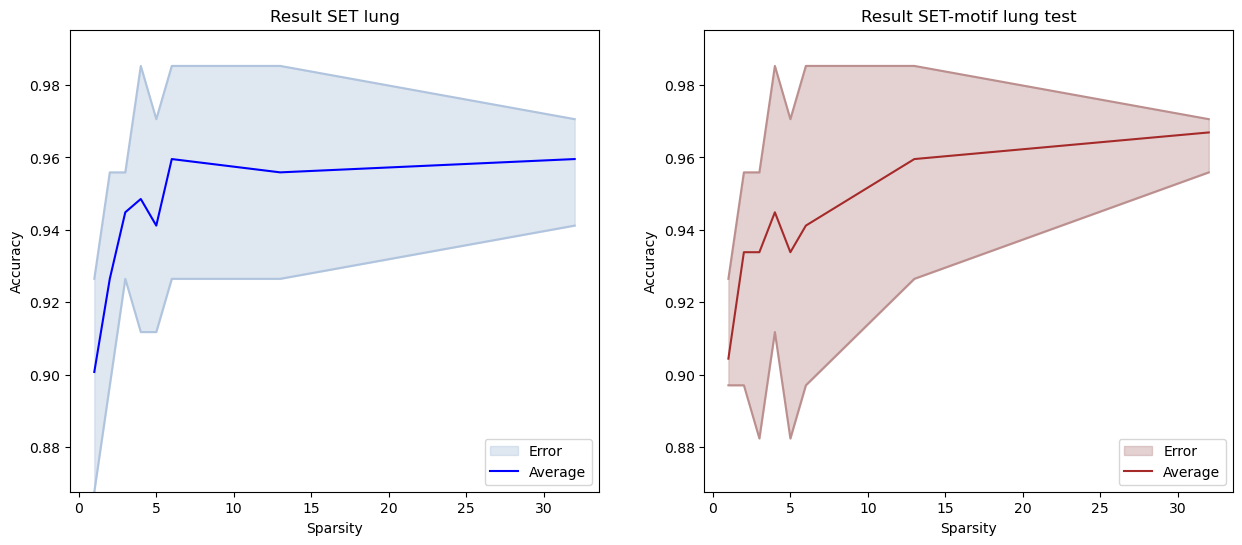

In [17]:
overall_min = min(lung_result['min'].min(), lung_result['average'].min())
overall_max = max(lung_result['max'].max(), lung_result['average'].max())
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].plot(lung_result['sparsity'], lung_result['max'], color='lightsteelblue')
axs[0].plot(lung_result['sparsity'], lung_result['min'], color='lightsteelblue')
axs[0].fill_between(lung_result['sparsity'], lung_result['min'], lung_result['max'], label='Error', color='lightsteelblue', alpha=0.4)
axs[0].plot(lung_result['sparsity'], lung_result['average'], label = 'Average',color='blue')
axs[0].set_xlabel('Sparsity')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Result SET lung')
axs[0].legend(loc = 'lower right',fontsize = 'medium')

axs[1].plot(lung_motif_result['sparsity'], lung_motif_result['max'], color='rosybrown')
axs[1].plot(lung_motif_result['sparsity'], lung_motif_result['min'], color='rosybrown')
axs[1].fill_between(lung_motif_result['sparsity'], lung_motif_result['min'], lung_motif_result['max'], label='Error', color='rosybrown', alpha=0.4)
axs[1].plot(lung_motif_result['sparsity'], lung_motif_result['average'], label = 'Average',color='brown')
axs[1].set_xlabel('Sparsity')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Result SET-motif lung test')
axs[1].legend(loc = 'lower right',fontsize = 'medium')

axs[0].set_ylim(overall_min, overall_max+0.01)
axs[1].set_ylim(overall_min, overall_max+0.01)